In [1]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

In [2]:
# Hamiltonian equations of motion
def f(w):
    x, y, u, v = w
    r = np.sqrt(x**2 + y**2)
    return np.array([u, v, -x/r**3, -y/r**3])

In [3]:
# Jacobian matrix
def df(w):
    x, y, u, v = w
    r = np.sqrt(x**2 + y**2)
    return np.array([[0, 0, 1, 0], 
                     [0, 0, 0, 1], 
                     [-1/r**3 + 3*x**2/r**5, 3*x*y/r**5, 0, 0], 
                     [3*y*x/r**5, -1/r**3 + 3*y**2/r**5, 0, 0]])

In [4]:
# Implicit midpoint rule
def implicit_midpoint_rule(f, df, w0, h, N):
    w = np.zeros((N+1, len(w0)))
    w[0] = w0
    k0 = np.linalg.solve(np.eye(len(w[0])) - h/2*df(w[0]), f(w[0]))
    for i in range(N):
        def F(k):
            return k - f(w[i] + h/2*k)
        def dF(k):
            return np.eye(len(k)) - h/2*df(w[i] + h/2*k)
#         k0 = f(w[i])
#         k0 = np.linalg.solve(np.eye(len(w[i])) - h/2*df(w[i]), f(w[i]))
#         k = fsolve(lambda k: F(k) - k0, k0, fprime=dF)
        k = fsolve(lambda k: F(k), k0, fprime=dF)
        w[i+1] = w[i] + h*k
    return w

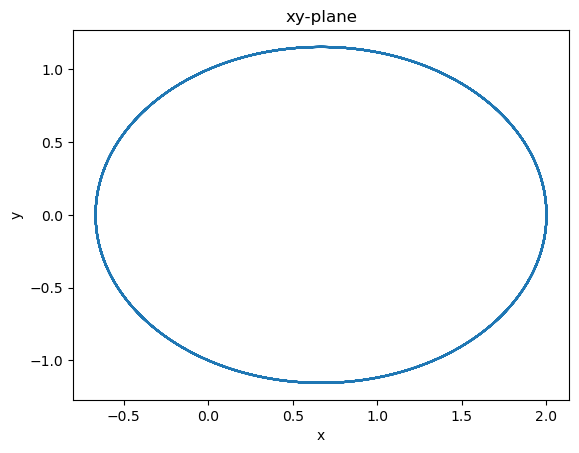

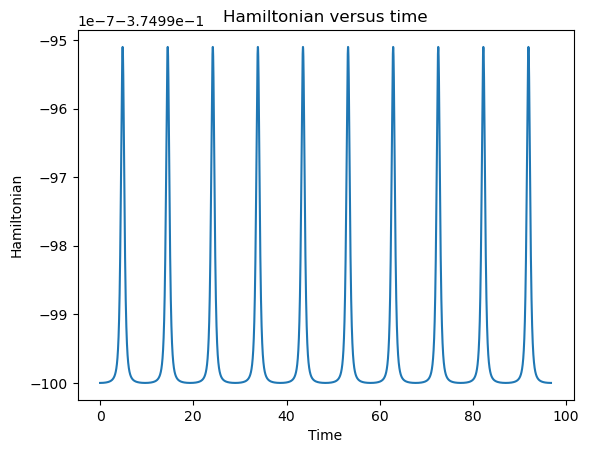

In [7]:
# Initial conditions
w0 = np.array([2, 0, 0, 0.5])

# Time points
# T = 2*np.pi*10  # 10 revolutions
# h = 0.001  # time step
T = 2*np.pi*(4/3)**(3/2)
h = T/10000
N = int(10*T/h)  # number of steps
t = np.linspace(0, 10*T, N+1)

# Integrate the system
w = implicit_midpoint_rule(f, df, w0, h, N)

# Plot x and y components
plt.figure()
plt.plot(w[:,0], w[:,1])
plt.xlabel('x')
plt.ylabel('y')
plt.title('xy-plane')

# Calculate the Hamiltonian
H = 0.5*(w[:,2]**2 + w[:,3]**2) - 1/np.sqrt(w[:,0]**2 + w[:,1]**2)

# Plot the Hamiltonian versus time
plt.figure()
plt.plot(t, H)
plt.xlabel('Time')
plt.ylabel('Hamiltonian')
plt.title('Hamiltonian versus time')

plt.show()

In [9]:
# Define the gradient of the Hamiltonian
def grad_H(p, q):
    u, v = p
    x, y = q
    r = np.sqrt(x**2 + y**2)
    return np.array([u, v, x / r**3, y / r**3])

# Stoermer-Verlet method
def stoermer_verlet(f, w0, h, N):
    w = np.zeros((N+1, len(w0)))
    w[0] = w0
    for i in range(N):
        w_half = w[i] + h/2*f(w[i])
        w[i+1] = w[i] + h*f(w_half)

#         p_half = P[i] - h/2 * grad_H(P[i], Q[i])[2:]
#         Q[i+1] = fsolve(lambda q: q - Q[i] - h/2 * (grad_H(p_half, Q[i])[:2] + grad_H(p_half, q)[:2]), Q[i])
#         P[i+1] = p_half - h/2 * grad_H(p_half, Q[i+1])[2:]
        
    return w

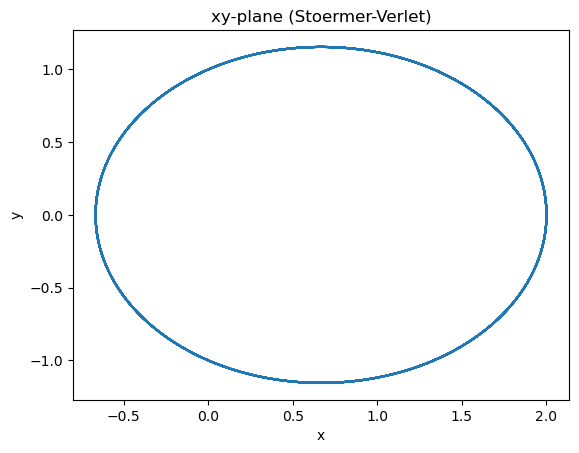

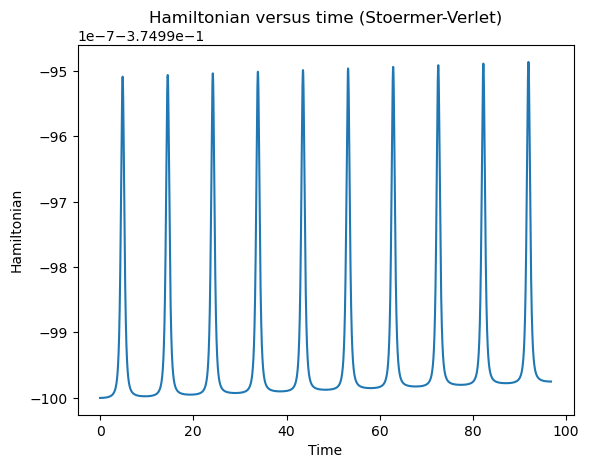

In [12]:
# Initial conditions
w0 = np.array([2, 0, 0, 0.5])

# Time points
# T = 2*np.pi*10  # 10 revolutions
# h = 0.01  # time step
# N = int(T/h)  # number of steps
# t = np.linspace(0, T, N+1)
T = 2*np.pi*(4/3)**(3/2)
h = T/10000
N = int(10*T/h)  # number of steps
t = np.linspace(0, 10*T, N+1)

# Integrate the system
w_sv = stoermer_verlet(f, w0, h, N)

# Plot x and y components
plt.figure()
plt.plot(w_sv[:,0], w_sv[:,1])
plt.xlabel('x')
plt.ylabel('y')
plt.title('xy-plane (Stoermer-Verlet)')

# Calculate the Hamiltonian
H_sv = 0.5*(w_sv[:,2]**2 + w_sv[:,3]**2) - 1/np.sqrt(w_sv[:,0]**2 + w_sv[:,1]**2)

# Plot the Hamiltonian versus time
plt.figure()
plt.plot(t, H_sv)
plt.xlabel('Time')
plt.ylabel('Hamiltonian')
plt.title('Hamiltonian versus time (Stoermer-Verlet)')

plt.show()